# Fitting a Linear Regression Function

### Introduction

In the previous section, we discussed our formula for linear regression, $y$ = $mx + b$.  And we saw how we can use our SciKit Learn library to discover the estimated values for $m$ and $b$.  But how does SciKit Learn, or any linear regression model come up with these numbers.  In this lesson we'll start finding out.

### How SciKit Learn "Fits"

Now SciKit Learn finds values for $m$ and $b$ when we *fit* our linear regression model to the data.  Let's again see how we do this.

In [6]:
inputs = [800, 1500, 2000, 3500, 4000]
sklearn_inputs = [ [800], 
    [1500],
    [2000],
    [3500],
    [4000] ]
outcomes = [330, 780, 1130, 1310, 1780]

In [7]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
# create the initial model
regression.fit(sklearn_inputs, outcomes)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Once we call the `fit` function, the model has come up with numbers for both the coefficient and the intercept.

In [8]:
regression.coef_

array([0.38675261])

In [9]:
regression.intercept_

153.26385079539216

When we `fit` the line, what we are trying to do is find the line that best matches the data that we pass through the model - our inputs and outcomes.  By "best matches" we mean, the line that comes closes to the data.  So how do we get a line that comes closes to the data?

These are the steps.

1. Start with an initial model: that is, initial values for $m$ and $b$, these numbers can be anything.
2. Evaluate a model by calculating how close the model predicts our observed observed data
3. Update the parameters of our linear regression model and evaluate this updated model
4. Stop when we have a linear regression model that comes as close as possible to the data

In the rest of this lesson, we'll examine the first two steps, building an initial model and evaluating the model.

### Building the initial model

It's easy enough to build an initial model.  All we need to do is select some numbers for our values of $m$ and $b$.  So we'll choose $m = .6$ and $b = 100$.  Which means that our function is:

$$y = .6x + 100$$ 
or 

$$tshirt\_sales = .6*ad\_spend + 100$$ 

This is what this model looks like next to our data.

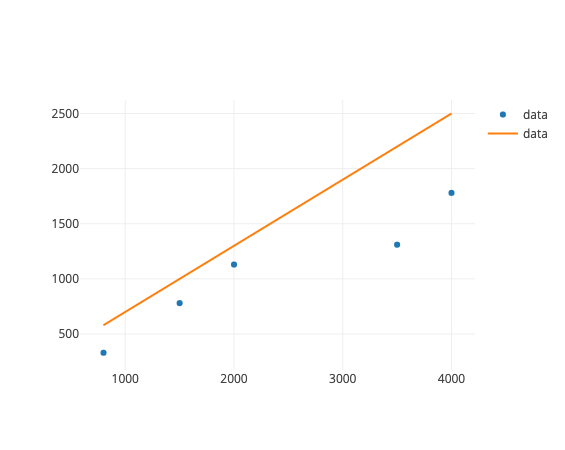

In [10]:

from graph import plot, trace_values
data_trace = trace_values(inputs, outcomes)
predictions = list(map(lambda ad_sale: .6*ad_sale + 100, inputs))
predictions_trace = trace_values(inputs, predictions, mode = 'lines')
plot([data_trace, predictions_trace])

So remember that the blue dots represent the actual data of each advertising budget dollars and it's corresponding monthly sales.  And the orange line is the predictions from our initial linear regression model.

Our goal is that our model predicts our observed -- or graphically that our orange line comes close to the blue dots.

## Evaluating the model

We evaluate the model by seeing how close our predicted outcomes come to the actual observed outcomes.  The closer our model is to predicting the actual data, the better.  Let's make this closeness more visual.

In [11]:
from error import error_line_traces
import plotly.plotly as py
errors = [-250, -220, -170, -890, -720]
error_traces = error_line_traces(inputs, outcomes, errors)
py.plot([data_trace, predictions_trace, *error_traces])

'https://plot.ly/~JeffKatzy/184'

Now each red line represents the difference between the t shirt sales that our model predicts for a given amount of advertising spent, and what we actually observed.  

Let's focus in on that first red line.  Our model predicts t-shirt sales of 400 while the observed t-shirt sales was 330.  The red line shows the difference.

Now let's turn these red lines into a number.  We do this by calculating the *difference* between the actual data and what our model expects.  We call this difference our **error**.

> error = actual - expected

Now just like we had standard symbols to represent our components of linear regression (y = mx + b), we also have symbols to represent the formula above. Here they are: 

> * $y^{(i)}$ represent our actual, or observed target variables
> * $\bar{y^{(i)}}$ (pronounced y hat) represents our predicted output 
> * $\epsilon$ (epsilon) represents error
> 
Let's explore this a bit by looking at our formula for error at a given point.  
> 
> $\epsilon^{i} = y^{(i)} - \hat{y^{(i)}}$ 

So this just says that the error at given point equals the outcome we observed at that observation minus the outcome we predicted for that observation. 

Let's calculate the errors of our initial model with respect to our observed data.

$$tshirt\_sales = .6*ad\_spend + 100$$ 

|ad spending    |t-shirts| predicted t-shirts |  error |
| ------------- |:-----:|:-------------------:| :-----:| 
|    800        | 330  | 580  | -250|
|    1500       | 780 | 1000| -220|
|    2000      | 1130 | 1300| -170|
|    3500      | 1310 | 2200| -890|
|    4000      | 1780 | 2500| -720|

In [20]:
errors = [-250, -220, -170, -890, -720]
sum(errors)

-2250

Ok so we can see that our error for the first point is $330 - 580 = -250$.  And we can even calculate the **total error** of our model, just by adding these numbers up. 

$$total\_error = -250, -220, -170, -890, -720 = - 2250 $$

For now, we don't really care whether our numbers are positive or negative, what we care is whether just how close the number is to zero.  The closer the number is to zero the better we do.  

### One small problem

Now one way to discover if our model is any good is to compare it with other linear regression models.  So let's change the value of our linear regression model from $tshirt\_sales = .6*ad\_spend + 100$ to the following:

$$tshirt\_sales = .4*ad\_spend + 100$$

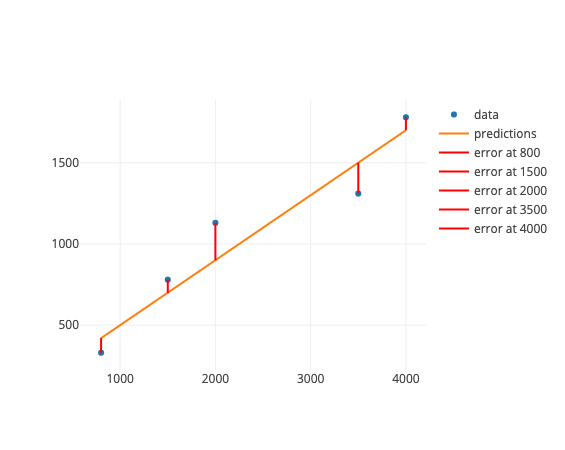

In [31]:
def updated_model_with_errors(parameter):
    predictions = list(map(lambda ad_spend: parameter*ad_spend + 100, inputs))
    predictions_trace = trace_values(inputs, predictions, 'lines', name = 'predictions')
    y_values_y_hats = list(zip(outcomes, predictions))
    errors = list(map(lambda pair: pair[0] - pair[1], y_values_y_hats))
    error_traces = error_line_traces(inputs, outcomes, errors)
    return plot([data_trace, predictions_trace] + error_traces)

parameter = .4
# feel free to change the parameter to .6 or other values of m and then re-execute the function
updated_model_with_errors(parameter)

Now let's recalculate our total error.

First we calculate the error at each data point.

|ad spending    |t-shirts| predicted t-shirts |  error |
| ------------- |:-----:|:-------------------:| :-----:| 
|    800        | 330  | 420  | -90|
|    1500       | 780 | 700| 80|
|    2000      | 1130 | 900| 230|
|    3500      | 1310 | 1500| -190|
|    4000      | 1780 | 1700| 80|

Now if we add up all of our points we get a total error of 110.  But take a look at the total error after just adding up our first two points:

In [34]:
-90 + 80

-10

Somehow our total error after two points is closer to zero than our total error after one point.  The positive and negative numbers are cancelling each other out.  This isn't good.  We want our total error to increase each time that our predicted output differs from our observed output.  We don't want our errors to cancel each other out.

We fix this by simply making each error positive, which we do by squaring the error.  

$$sum\_of\_squared\_errors = -90^2 + 80^2 + 230^2 + -190^2 + -80^2 $$

$$ = 8100 +  6400 + 52900 + 36100 + 6400 $$

$$ = 109,900 $$

So now, because each individual squared error is always positive, our errors will not cancel each other out.  We call this the **residual sum of the squared** (RSS). In machine learning and statistics, residual is just another word for error.  

### Comparing models

And now that we have expressed how well a model predicts our data with RSS, we can start to compare models to data.  For example, we go back and calculate the RSS for our first model of 

$$tshirt\_sales = .6*ad\_spend + 100$$ we get:

|ad spending    |t-shirts| predicted t-shirts |  squared error |
| ------------- |:-----:|:-------------------:| :-----:| 
|    800        | 330  | 580  | 62500|
|    1500       | 780 | 1000| 48400|
|    2000      | 1130 | 1300| 28900|
|    3500      | 1310 | 2200| 792100|
|    4000      | 1780 | 2500| 518400|

And the sum of the squared errors, or the RSS for this model is 1,450,300.

So our first model of $tshirt\_sales = .4*ad\_spend + 100$ had an RSS of 109,900 and the second model of $tshirt\_sales = .6*ad\_spend + 100$ has an RSS of 1,050,300 .  So because the RSS is smaller with our first model than our second model,  our first model is better fit to the data.

### Summary

In this lesson, we saw how to evaluate a machine learning model.  We do this by seeing how well the model matches the actual data.  The closer the model is to the data, the better our model.  

We can summarize how well the model fits the data by calculating the error at each of our actual data points, where our $error =  actual - expected$.  We add up the error at each datapoint to calculate the **total error**.

Then we saw that **total error** has a flaw, where the errors can cancel each other out when some errors are positive and others are negative.  To fix this, we make each of our errors positive by squaring each error.  And then we add up our squared errors to calculate the **residual sum of the squares** (RSS).  We can use our RSS score to try different models and then choose the one with the lowest score.